In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
content = []
with open("enwiki-20201001-pages-meta-history13.xml-p11424666p11424865", encoding = 'utf8') as file:
    
    content = file.readlines()
    content = "".join(content)
    soup = BeautifulSoup(content, "xml")


In [3]:
pages = soup.findAll("page")
pages[1]

<page>
<title>User talk:87.41.23.88</title>
<ns>3</ns>
<id>11424671</id>
<revision>
<id>133553219</id>
<timestamp>2007-05-26T02:23:45Z</timestamp>
<contributor>
<username>Stepp-Wulf</username>
<id>80874</id>
</contributor>
<comment>mild warning to vandal.</comment>
<model>wikitext</model>
<format>text/x-wiki</format>
<text bytes="189" xml:space="preserve">The silliness you inserted into Takeshi's Castle Challenges has been removed. Your editing is considered vandalism, so stop.  Thanks, [[User:Stepp-Wulf|Stepp-Wulf]] 02:23, 26 May 2007 (UTC)</text>
<sha1>mudsz36q1ilh4m8fil8t5s0ia084rxu</sha1>
</revision>
</page>

In [4]:
data = []
for page in pages:
    try:
        title = page.title.text
    except:
        title = none
        
    try:
        ns = page.ns.text
    except: 
        ns = none
        
    try:
        page_id = page.id.text
    except:
        page_id = none
    
    try:
        revision_id = page.revision.id.text
    except:
        revision_id = none
    
    try:
        parent_id = page.parent.id.text
    except:
        parent_id = none
    
    try:
        timestamp = page.timestamp.text
    except:
        timestamp = none
        
    try:
        username = page.contributor.username.text
    except:
        username = none
        
    try:
        contributor_id = page.contributor.id.text
    except:
        contributor_id = none
        
    try:
        comment = page.comment.text
    except:
        comment = none
    
    try:
        model = page.model.text
    except:
        model = none
        
    try:
        page_format = page.format.text
    except:
        page_format = none
        
        
    try:
        text = page.format.next_sibling.next_sibling.text
    except:
        text = none
        
    data.append([title, ns, page_id, revision_id, parent_id, timestamp, username, 
            contributor_id, comment, model, page_format, text])
data[0]

['Altoona and Wopsononock Railroad',
 '0',
 '11424669',
 '133553189',
 '11424669',
 '2007-05-26T02:23:31Z',
 'Choess',
 '245519',
 'redirect',
 'wikitext',
 'text/x-wiki',
 '#REDIRECT [[Altoona and Beech Creek Railroad]]']

In [5]:
df = pd.DataFrame(data, columns = ['title', 'ns', 'page_id', 'revision_id', 'parent_id', 'timestamp', 'username', 'contributor_id', 'comment', 'model', 'page_format', 'text'])
df.head()

,title,ns,page_id,revision_id,parent_id,timestamp,username,contributor_id,comment,model,page_format,text
0,Altoona and Wopsononock Railroad,0,11424669,133553189,11424669,2007-05-26T02:23:31Z,Choess,245519,redirect,wikitext,text/x-wiki,#REDIRECT [[Altoona and Beech Creek Railroad]]
1,User talk:87.41.23.88,3,11424671,133553219,11424669,2007-05-26T02:23:45Z,Stepp-Wulf,80874,mild warning to vandal.,wikitext,text/x-wiki,The silliness you inserted into Takeshi's Cast...
2,Altoona & Wopsononock Railroad,0,11424672,133553226,11424669,2007-05-26T02:23:50Z,Choess,245519,redirect,wikitext,text/x-wiki,#REDIRECT [[Altoona and Beech Creek Railroad]]
3,Westview Village,0,11424674,133553231,11424669,2007-05-26T02:23:52Z,Johntwrl,2121913,[[WP:AES|←]]Redirected page to [[Westview Vill...,wikitext,text/x-wiki,#REDIRECT [[Westview Village (Edmonton)]]
4,Matysiakowie,0,11424676,133553269,11424669,2007-05-26T02:24:07Z,Piotrus,59002,stub from pl wiki,wikitext,text/x-wiki,'''Matysiakowie''' is one of the most popular ...


In [8]:
df.shape

(142, 12)

(array([ 26.,   2., 108.,   1.,   0.,   0.,   0.,   1.,   0.,   4.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

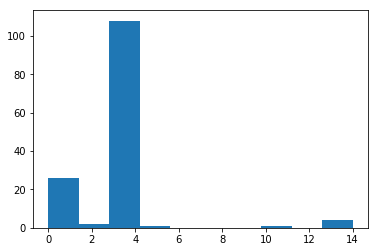

In [6]:
df.ns = df.ns.apply(lambda x: int(x))
plt.hist(df.ns)

In [7]:
df.username.value_counts(normalize = True)

MichaelBillington           0.654930
Choess                      0.049296
Skier Dude                  0.028169
Nixeagle                    0.021127
Fleela                      0.014085
Doma-w                      0.014085
Alastair Haines             0.014085
BeckyAnne                   0.014085
Rmky87                      0.007042
Maias                       0.007042
Brianahier                  0.007042
Bearcat                     0.007042
DagnyB                      0.007042
Cbl62                       0.007042
SpecialWindler              0.007042
Eleoopy                     0.007042
PrestonH                    0.007042
Padraicoc                   0.007042
Poindexter Propellerhead    0.007042
Wombatcat                   0.007042
Johntwrl                    0.007042
Piotrus                     0.007042
Aeronautico                 0.007042
Chrishmt0423                0.007042
Somenamethisis              0.007042
Animum                      0.007042
Jossi                       0.007042
R